In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy import stats


In [2]:
df=pd.read_csv('df.csv', index_col='date')
df.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17.380822
2002-07-17,10.09,-0.6,1984-11-10,TTO,17.693151
2018-02-06,10.09,0.9,2000-05-09,USA,17.758904
2017-04-08,10.05,-0.6,1999-06-03,JPN,17.860274
2008-06-28,10.01,1.6,1990-08-01,USA,17.920548


In [3]:
df.index = pd.to_datetime(df.index)
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2810 entries, 2013-04-28 to 2016-07-05
Data columns (total 5 columns):
winning_times    2810 non-null float64
tail_wind        2810 non-null float64
birth_date       2810 non-null datetime64[ns]
country          2810 non-null object
age              2810 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 131.7+ KB


In [11]:
df.age = df.age.astype(float).round().astype(int)
df.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17
2002-07-17,10.09,-0.6,1984-11-10,TTO,18
2018-02-06,10.09,0.9,2000-05-09,USA,18
2017-04-08,10.05,-0.6,1999-06-03,JPN,18
2008-06-28,10.01,1.6,1990-08-01,USA,18


In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
 

F_onewayResult(statistic=85810.26588825723, pvalue=0.0)

In [14]:
#ANOVA Test to test the influence of tailwind and age on winning times 

#stats.f_oneway(df.winning_times, df.tail_wind, df.age)
formula = 'winning_times ~ tail_wind + age'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

              sum_sq      df          F    PR(>F)
tail_wind   0.019475     1.0   3.894700  0.048537
age         0.064832     1.0  12.965481  0.000323
Residual   14.036094  2807.0        NaN       NaN


In [19]:
by_wind = df.sort_values(by='tail_wind')

In [21]:
length = len(by_wind.index)
if length%2 == 0:
    h1 = int(length/2)
else:
    h1 = int(round(length/2))

In [22]:
tw_expr = np.array(by_wind.tail_wind)[:h1]
tw_ctrl = np.array(by_wind.tail_wind)[h1:]

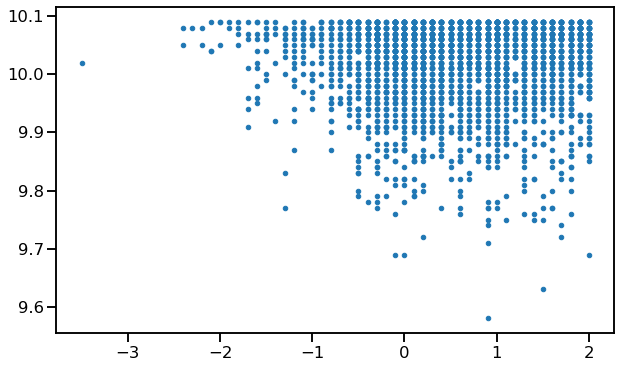

In [72]:
figure = plt.figure(figsize = (10, 6))
_= plt.plot(by_wind.tail_wind, by_wind.winning_times, marker='.', linestyle='none')

In [60]:
less_wind = by_wind["tail_wind"] < 0
more_wind = by_wind["tail_wind"] >= 0

In [61]:
tw_strong = by_wind[more_wind]

In [63]:
exp = np.array(tw_strong.winning_times)

In [64]:
tw_weak = by_wind[less_wind]
tw_weak.head()

,winning_times,tail_wind,birth_date,country,age
date,,,,,
2014-11-05,10.02,-3.5,1982-10-02,USA,32
2015-02-05,10.08,-2.4,1982-11-23,JAM,32
2015-06-06,10.05,-2.4,1982-11-23,JAM,33
2005-06-25,10.08,-2.3,1982-10-02,USA,23
2014-06-07,10.05,-2.2,1982-10-02,USA,32


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

def dist_plots(sample1, sample2):
   
    figure = plt.figure(figsize = (10, 6))
    return (sns.set_context('talk'), plt.figure(figsize = (10, 6)), 
            sns.distplot(sample1, color = 'magenta', norm_hist=True), 
            sns.distplot(sample2, color = 'gray', norm_hist=True))

(None,
 <Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c25291198>)

<Figure size 720x432 with 0 Axes>

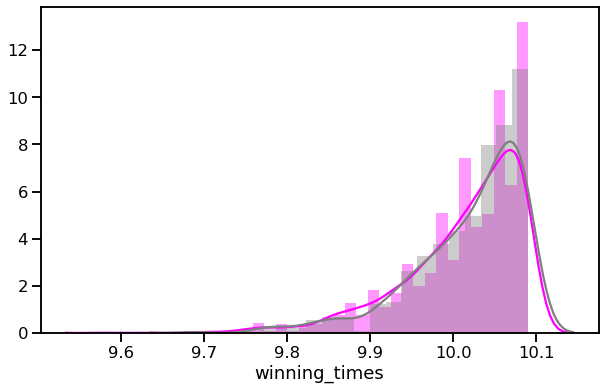

In [66]:
dist_plots(tw_strong.winning_times, tw_weak.winning_times)

In [67]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

In [68]:
welch_t(tw_strong.winning_times, tw_weak.winning_times)

2.114203109665401

In [87]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

welch_df(tw_strong.winning_times, tw_weak.winning_times)

1198.3717784858118

In [70]:
t = welch_t(tw_strong.winning_times, tw_weak.winning_times)
df = welch_df(tw_strong.winning_times, tw_weak.winning_times)
print(t,df)

2.114203109665401 1198.3717784858118


In [89]:
stats.ttest_ind(tw_weak.winning_times,tw_strong.winning_times, equal_var = False)

Ttest_indResult(statistic=2.114203109673011, pvalue=0.03470402297231195)

In [90]:
p = 1 - stats.t.cdf(t, df)
print(p)

0.017352011486481467


In [74]:
min_bywind=by_wind.groupby('tail_wind')['winning_times'].min()

In [75]:
x = np.array(min_bywind.index)
y = np.array(min_bywind)

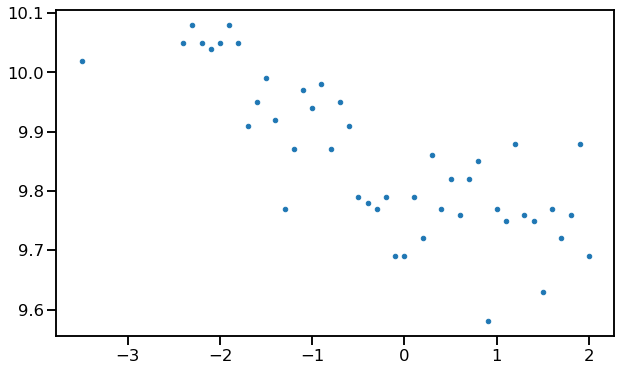

In [77]:
figure = plt.figure(figsize = (10, 6))
_=plt.plot(x,y, marker='.', linestyle='none')

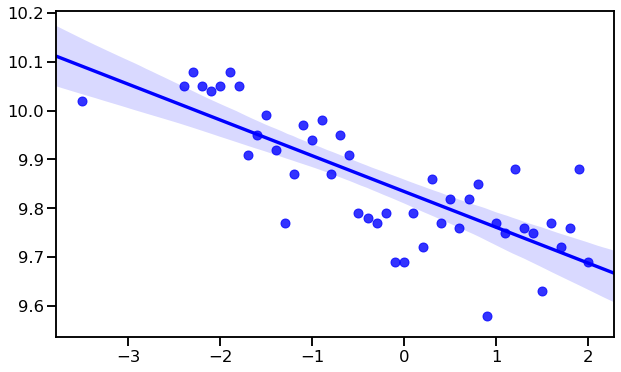

In [78]:
figure = plt.figure(figsize = (10, 6))
sns.regplot(x=x, y=y, color="b")

In [83]:
coef = np.polyfit(x,y,1)
coef

array([-0.07323086,  9.83423075])

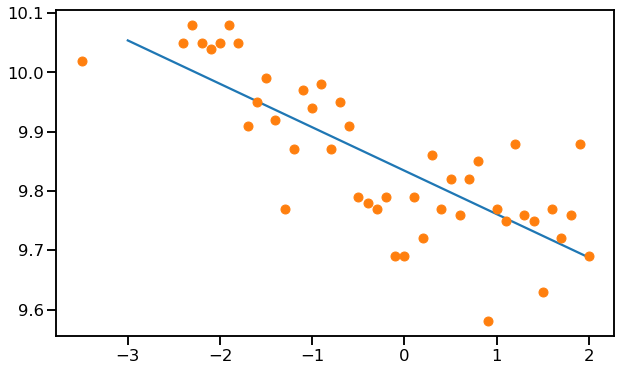

In [84]:
figure = plt.figure(figsize = (10, 6))
xnew = np.linspace(-3,2,100)
ynew = np.poly1d(coef)
_=plt.plot(xnew,ynew(xnew),x,y,'o')